In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_data =pd.read_csv('1.04.+Real-life+example.csv')

In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [4]:
df_data

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
4340  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
4341            BMW    6500.0      sedan        1      3.5      Petrol   
4342            BMW    8000.0      sedan      194      2.0      Petrol   
4343         Toyota   14200.0      sedan       31      NaN      Petrol   
4344     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year              Model  
0             yes  1991                320  
1             yes  1999       Sprinter 212  
2             yes  2003              S 500  
3             yes  2007                 Q7  
4             yes  2011              Rav 4  
...           ...   ...                ...  
4340          yes  2014              S 350  
4341          yes  1999                535  
4342          yes  1985                520  
4343          yes  2014            Corolla  
4344          yes  2013  T5 (Transporter)   

[4345 rows x 9 columns]

In [5]:
df_data.isna().values.any()

np.True_

In [6]:
df_data.duplicated().values.any()

np.True_

In [7]:
df_data.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [8]:
clean_data = df_data.copy()
clean_data = clean_data.dropna()

In [9]:
clean_data.isna().values.any()

np.False_

In [10]:
clean_data = clean_data.drop_duplicates()

In [11]:
clean_data.duplicated().values.any()

np.False_

In [12]:
clean_data.isnull().values.any()

np.False_

In [13]:
clean_data.nunique()

Brand             7
Price           892
Body              6
Mileage         407
EngineV          72
Engine Type       4
Registration      2
Year             39
Model           306
dtype: int64

In [14]:
clean_data.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3975    3975.000000   3975  3975.000000  3975.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           871            NaN   1518          NaN          NaN   
mean           NaN   19056.936091    NaN   164.820126     2.763643   
std            NaN   24976.141632    NaN   103.117252     4.965189   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6950.000000    NaN    92.000000     1.800000   
50%            NaN   11400.000000    NaN   159.000000     2.200000   
75%            NaN   21317.500000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         3975         3975  3975.000000     3975  
unique           4            2          NaN      306  
top         Diesel          yes          NaN  E-Class  
freq          1832         3604          NaN      181  
mean           NaN          NaN  2006.290063      NaN  
std            NaN          NaN     6.683223      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2002.000000      NaN  
50%            NaN          NaN  2007.000000      NaN  
75%            NaN          NaN  2011.000000      NaN  
max            NaN          NaN  2016.000000      NaN

In [15]:
import itertools

In [16]:
col_names = clean_data.columns.tolist()

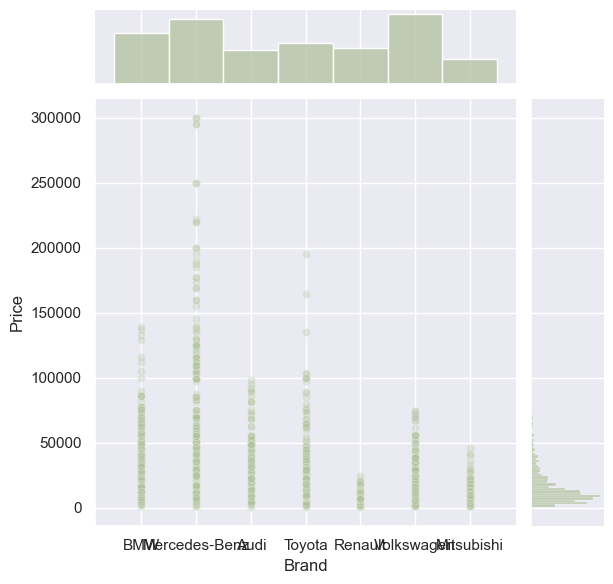

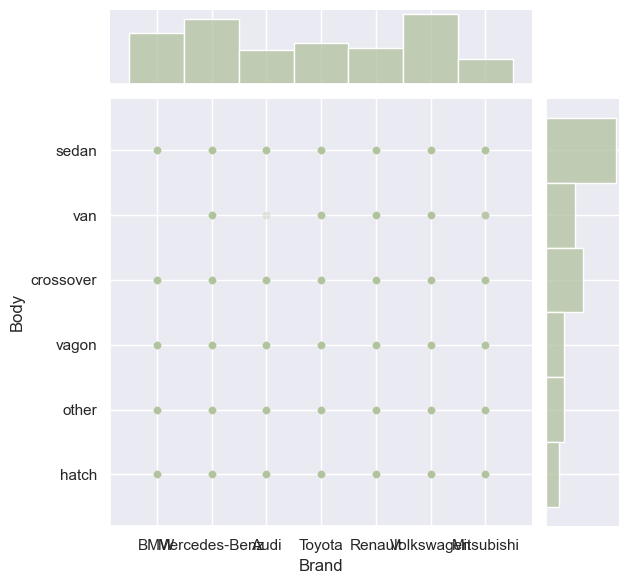

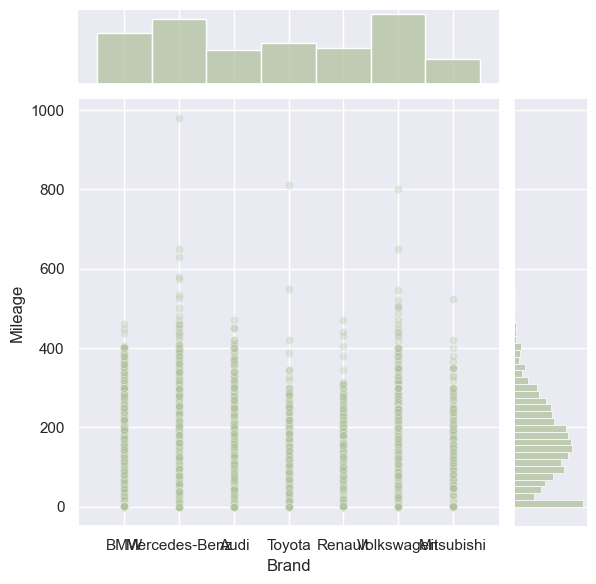

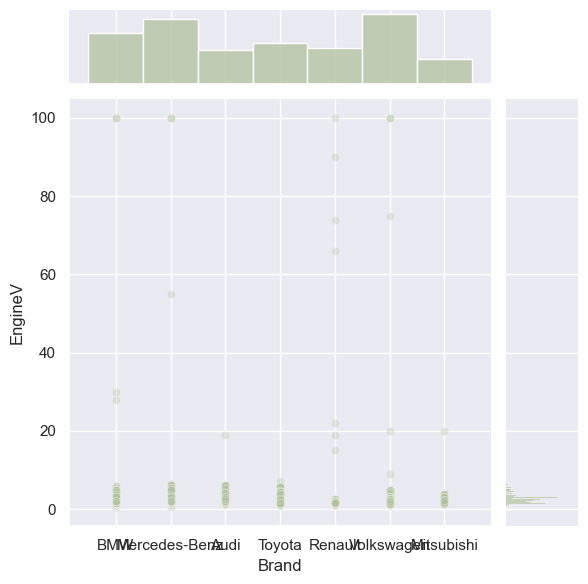

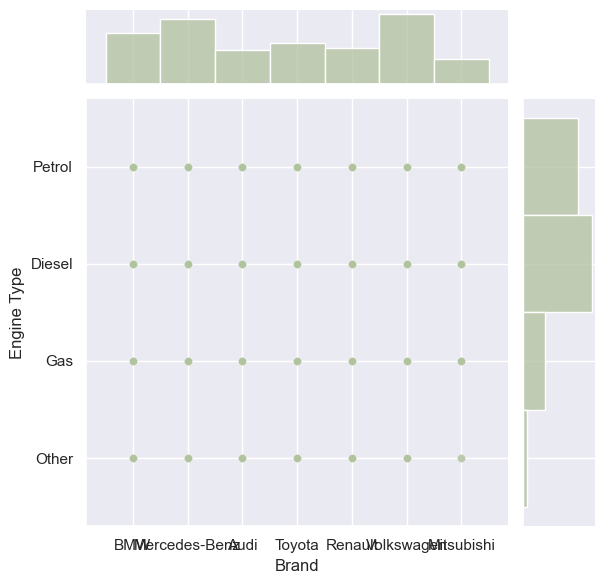

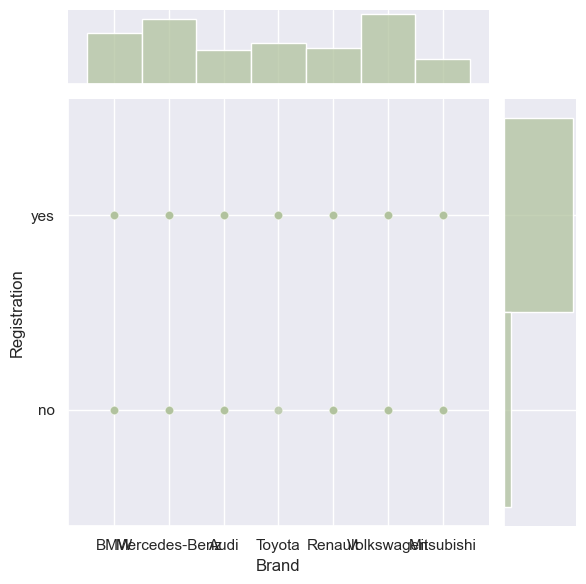

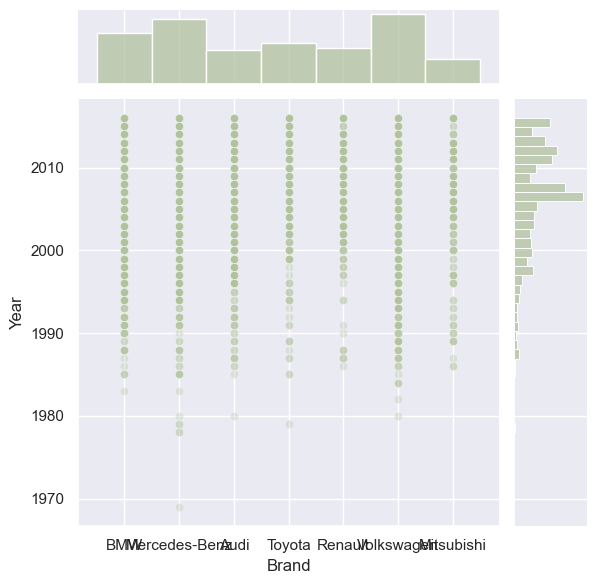

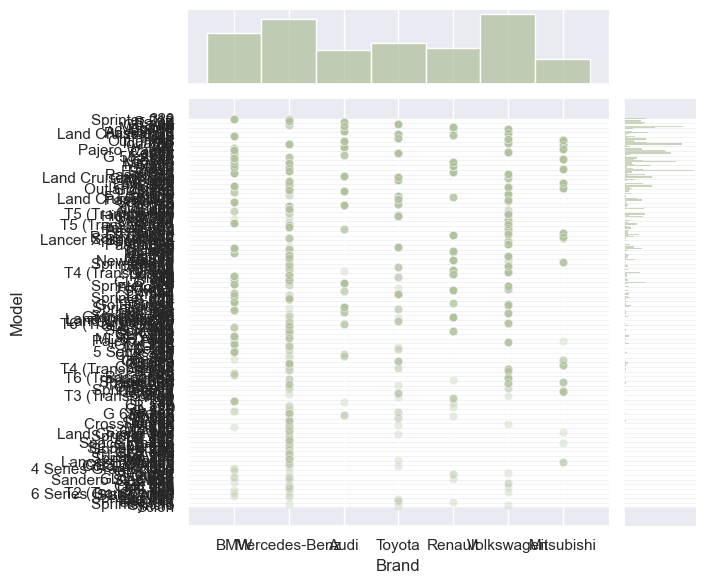

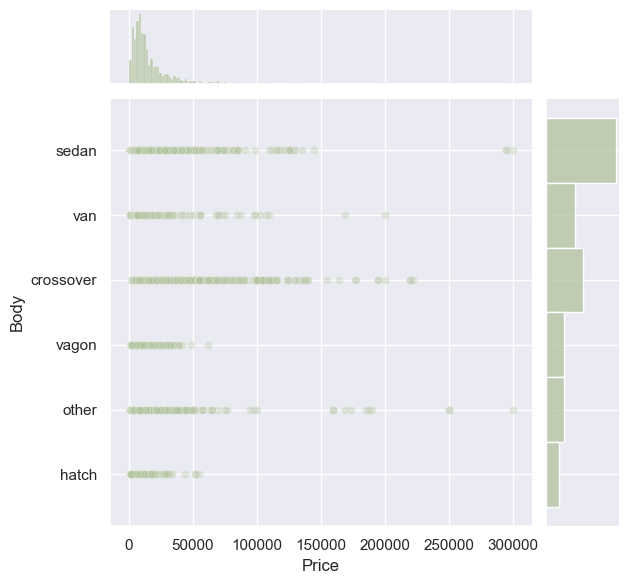

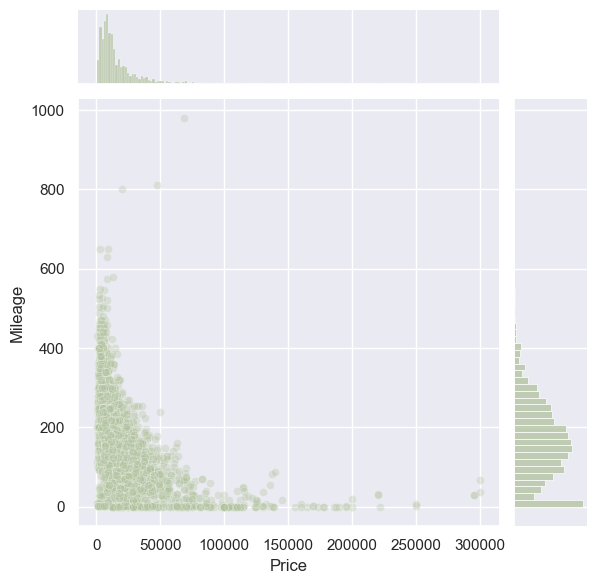

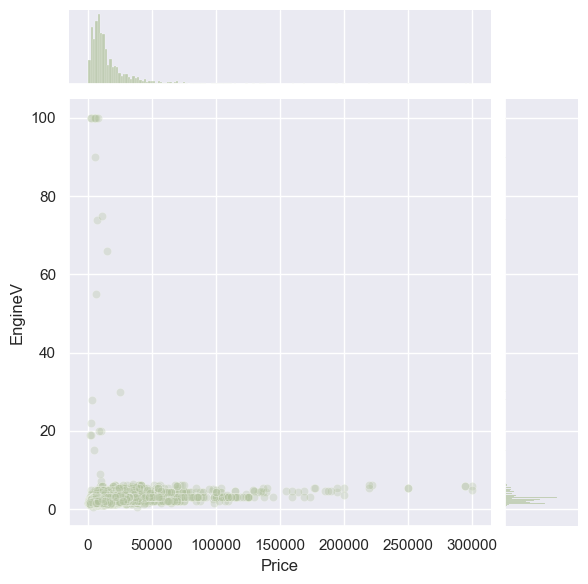

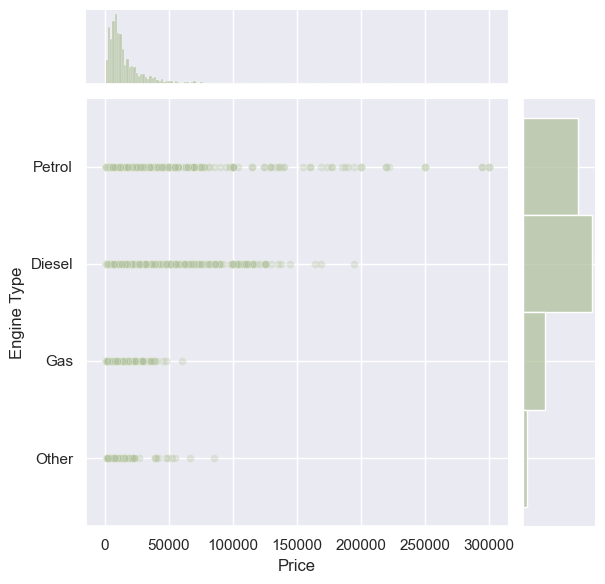

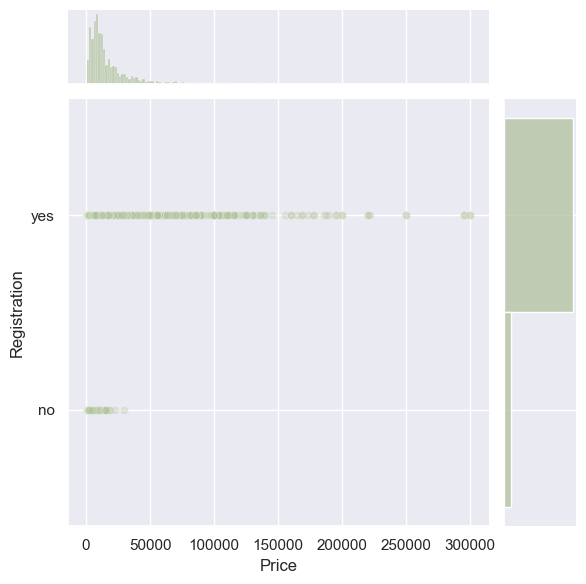

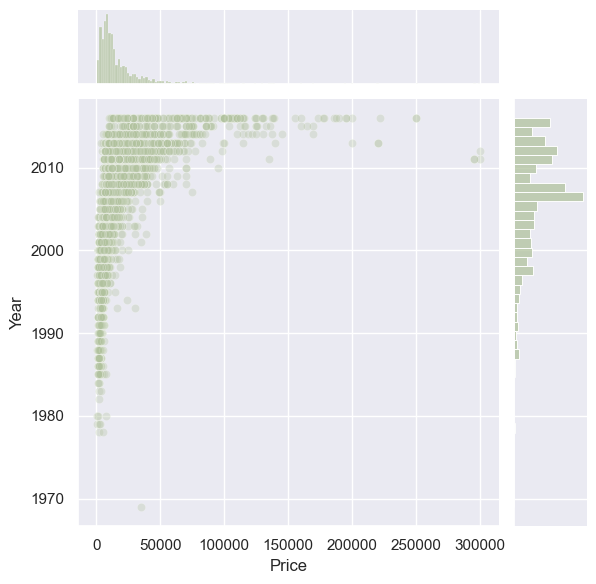

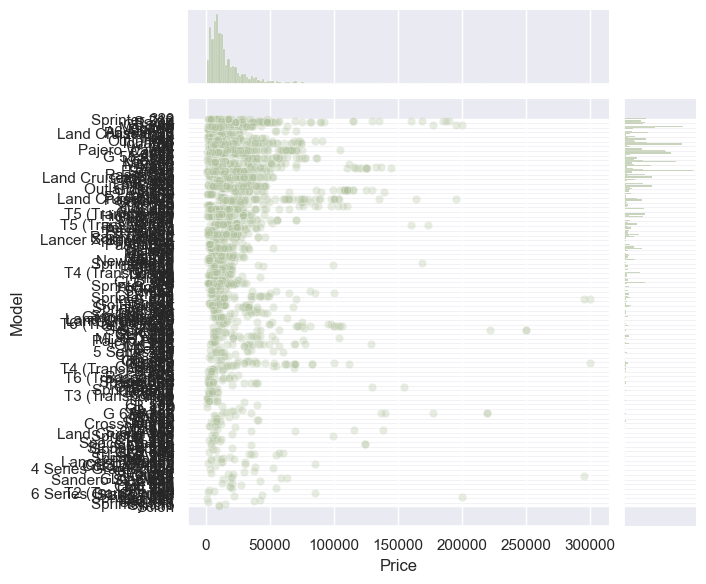

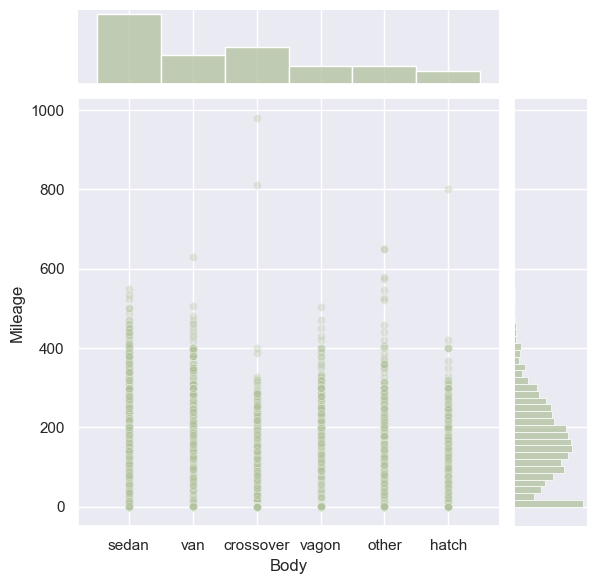

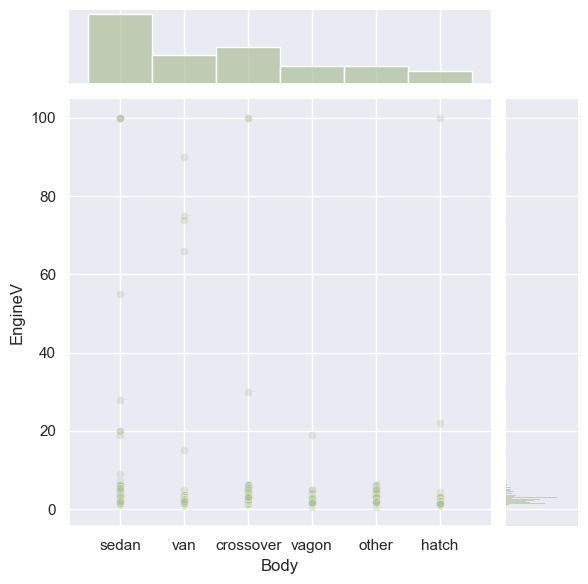

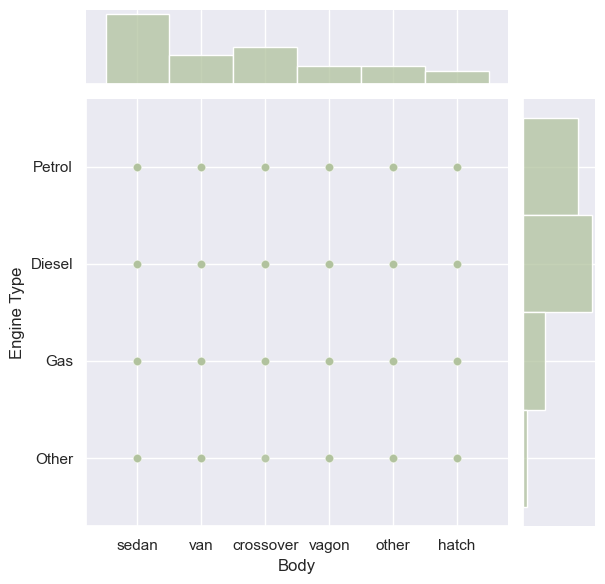

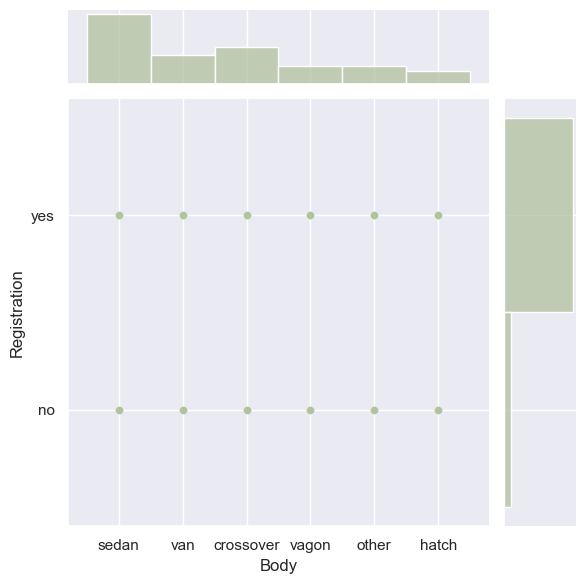

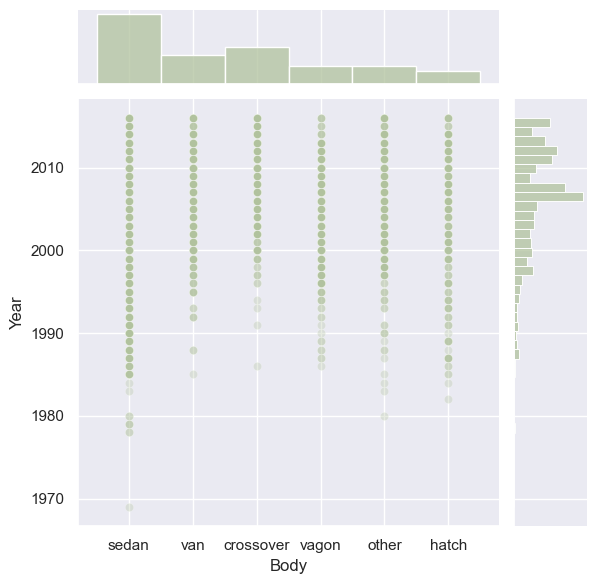

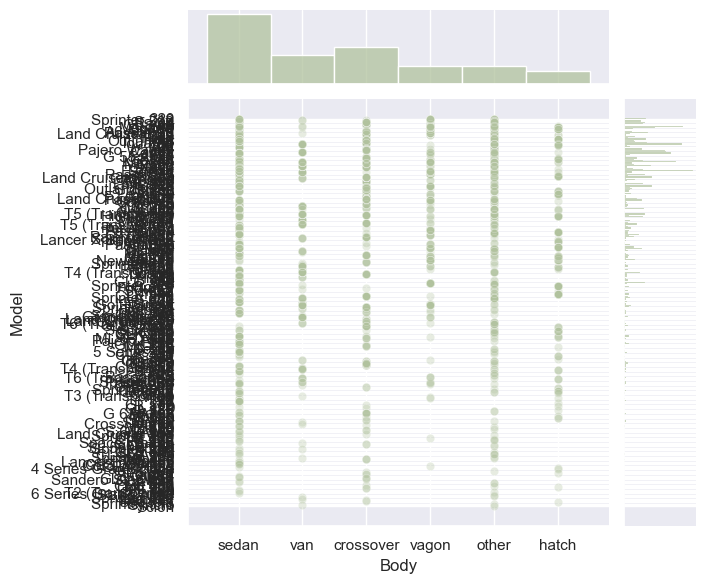

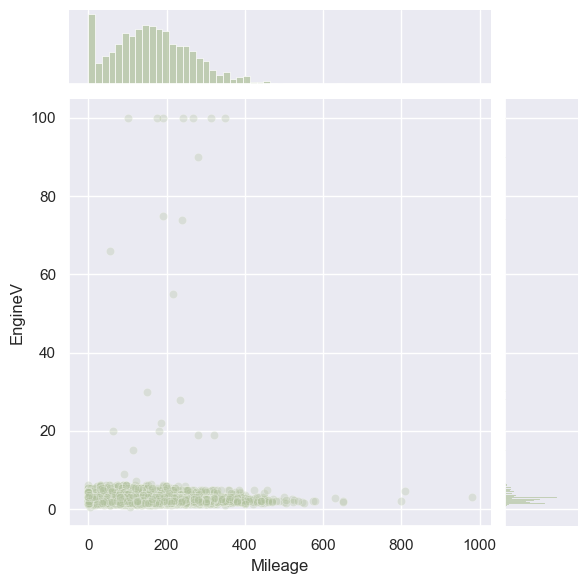

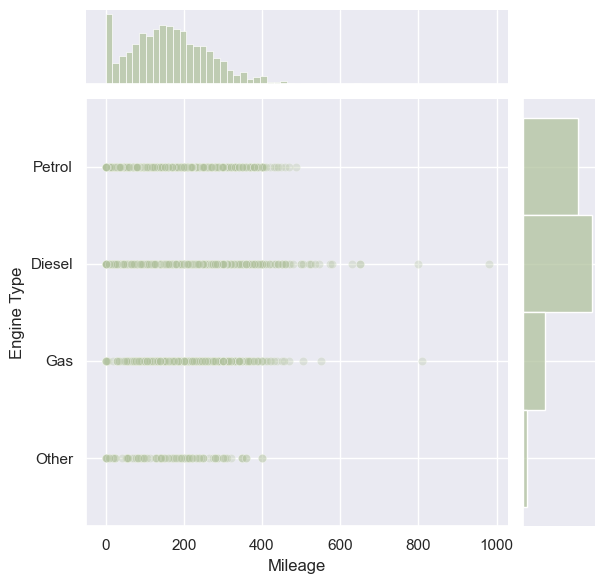

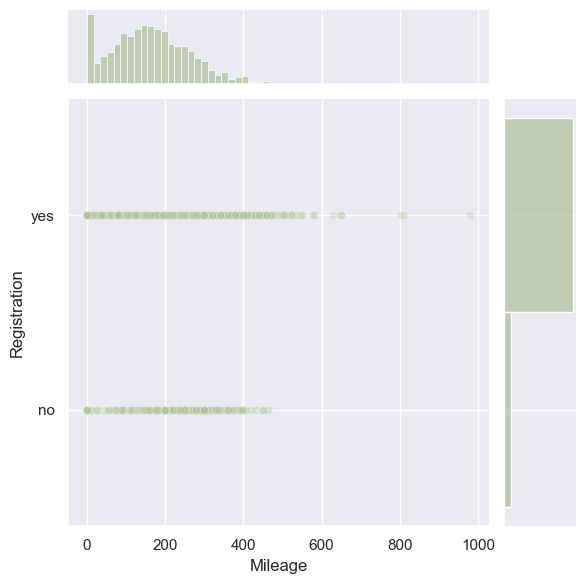

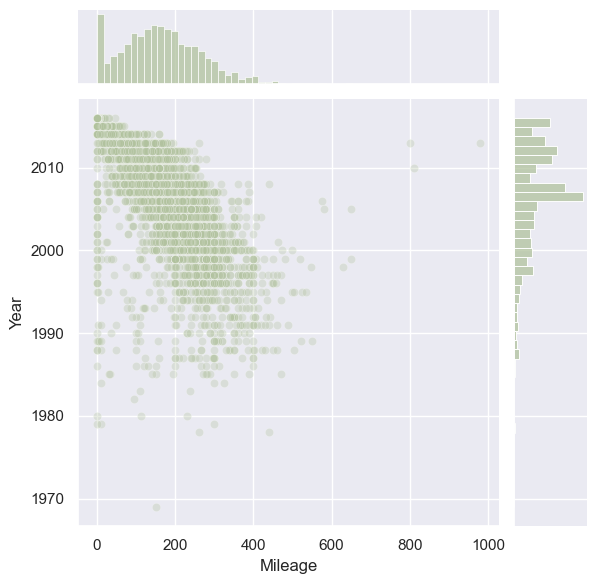

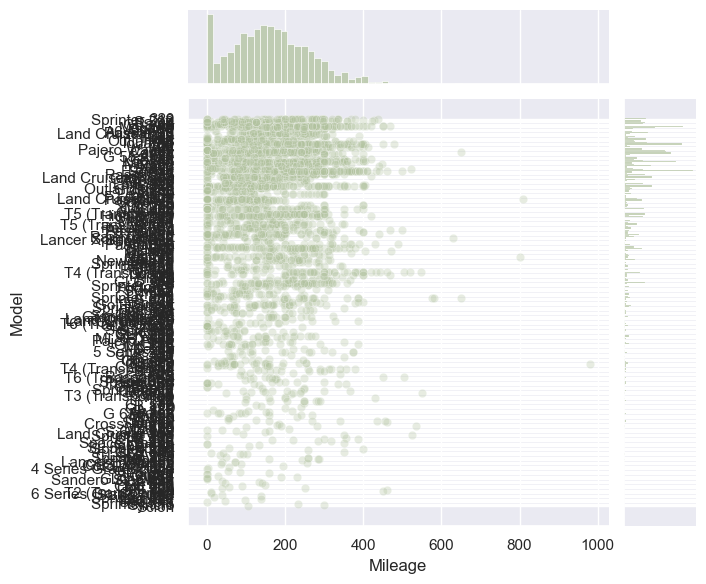

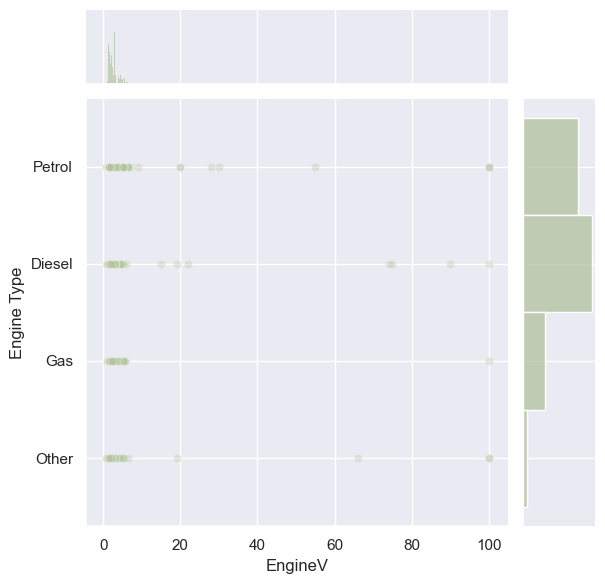

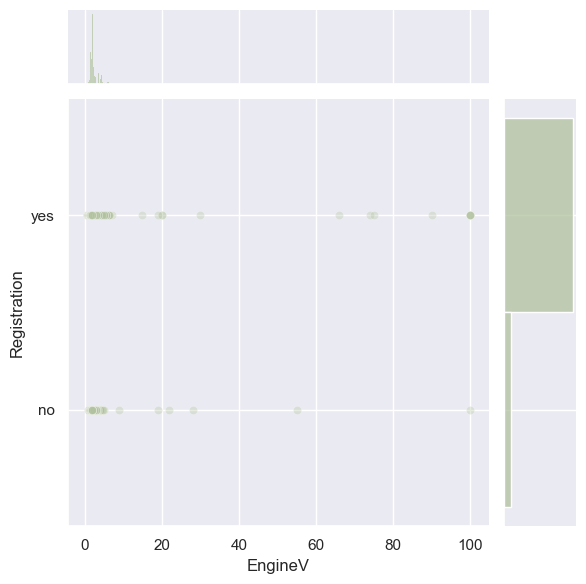

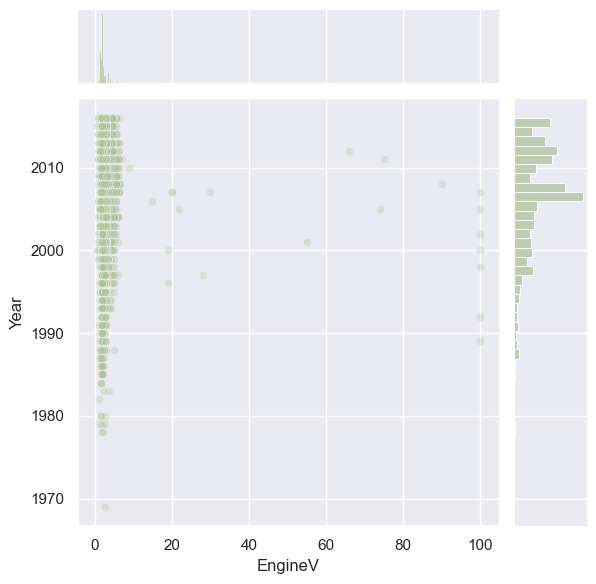

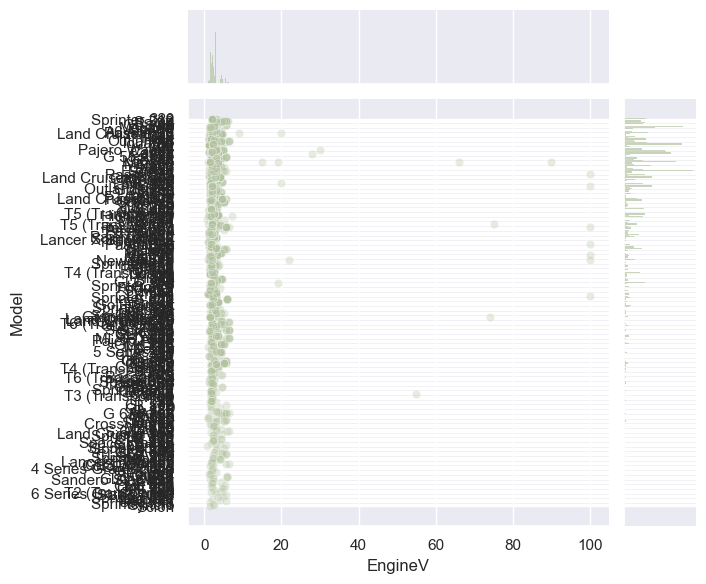

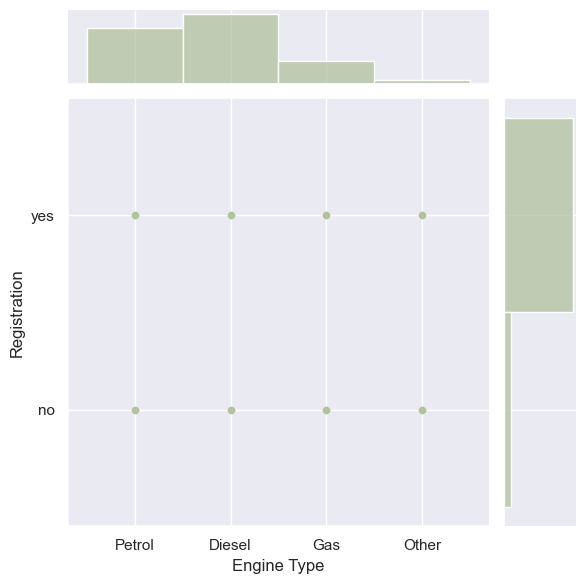

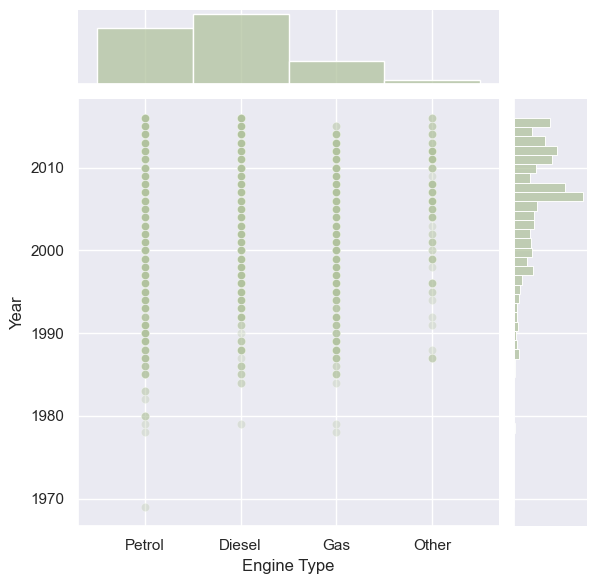

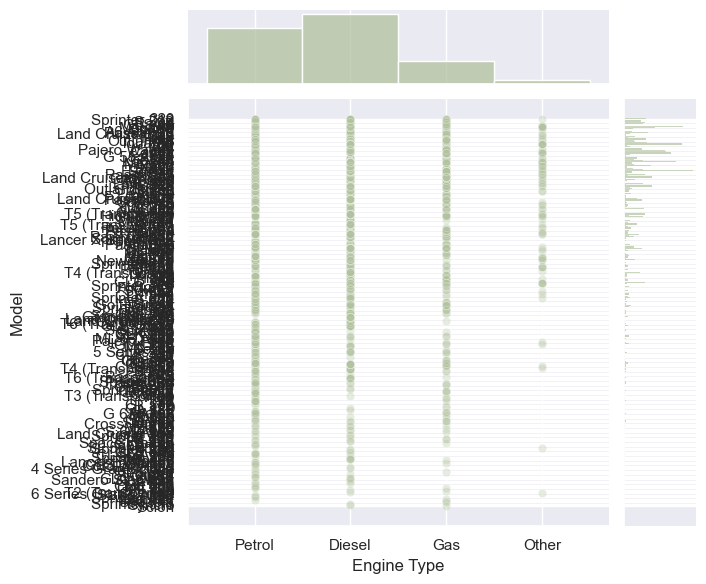

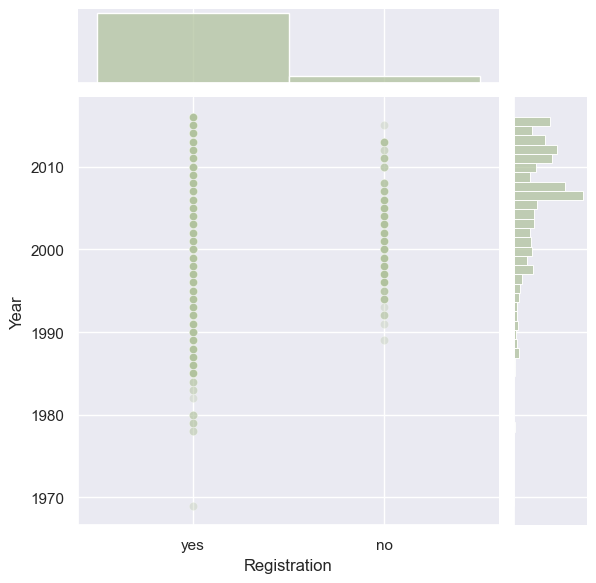

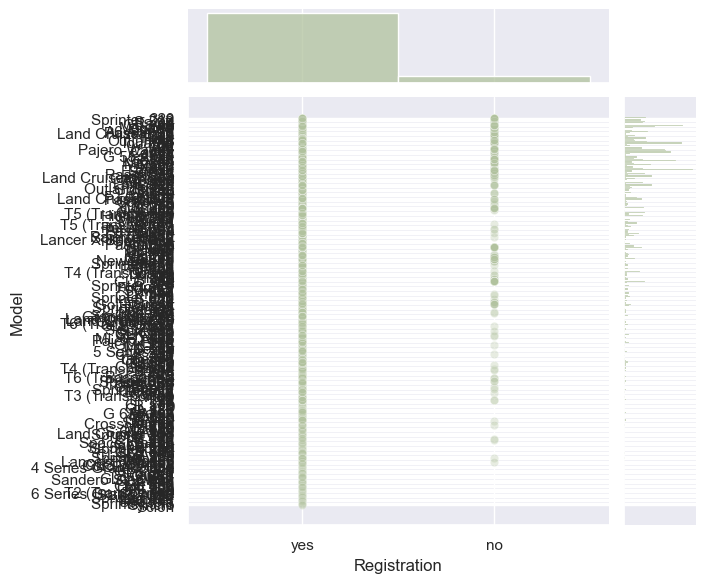

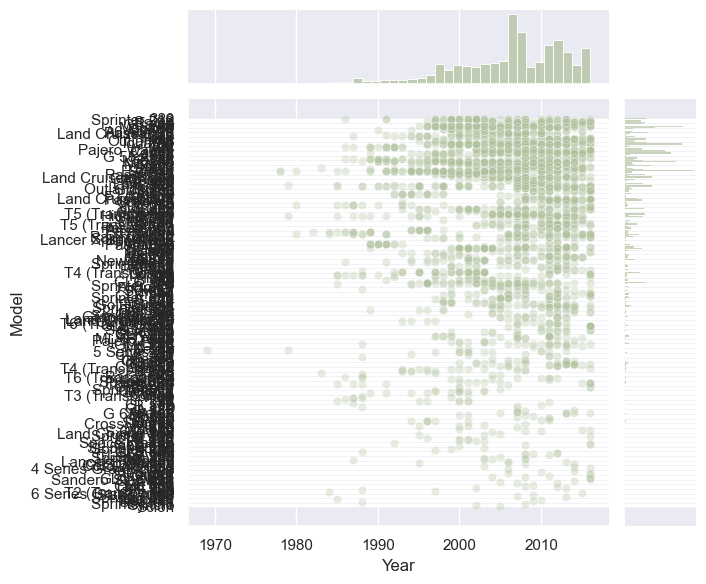

In [17]:
for item in list(itertools.combinations(col_names,2)):
    first_name = (item[0])
    second_name = (item[1])
    #print(clean_data[first_name])
        
    with sns.axes_style('darkgrid'):
        sns.jointplot(x=clean_data[first_name],
                      y=clean_data[second_name],
                      kind='scatter',
                      color ="#B1C29E",
                     joint_kws={'alpha':0.3})
    plt.show()

In [ ]:
sns.pairplot(clean_data)

In [18]:
q = clean_data['Mileage'].quantile(0.99)
clean_data = clean_data[clean_data['Mileage'] <q]

In [19]:
q = clean_data['EngineV'].quantile(0.99)
clean_data = clean_data[clean_data['EngineV'] <q]

In [20]:
q = clean_data['Price'].quantile(0.99)
r = clean_data['Price'].quantile(0.05)

In [21]:
r

np.float64(2600.0)

In [24]:
clean_data = clean_data[clean_data['Price'] <q] 
clean_data = clean_data[clean_data['Price'] >r]

In [25]:
clean_data.describe(include ="all")

Brand          Price   Body      Mileage      EngineV  \
count         3651    3651.000000   3651  3651.000000  3651.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           798            NaN   1376          NaN          NaN   
mean           NaN   18239.317477    NaN   159.005478     2.448091   
std            NaN   18251.248869    NaN    94.129482     0.928101   
min            NaN    2650.000000    NaN     0.000000     0.600000   
25%            NaN    7600.000000    NaN    91.000000     1.800000   
50%            NaN   11900.000000    NaN   155.000000     2.200000   
75%            NaN   21800.000000    NaN   220.000000     3.000000   
max            NaN  124999.000000    NaN   435.000000     6.000000   

       Engine Type Registration         Year    Model  
count         3651         3651  3651.000000     3651  
unique           4            2          NaN      284  
top         Diesel          yes          NaN  E-Class  
freq          1694         3414          NaN      162  
mean           NaN          NaN  2006.933991      NaN  
std            NaN          NaN     6.015940      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2004.000000      NaN  
50%            NaN          NaN  2008.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

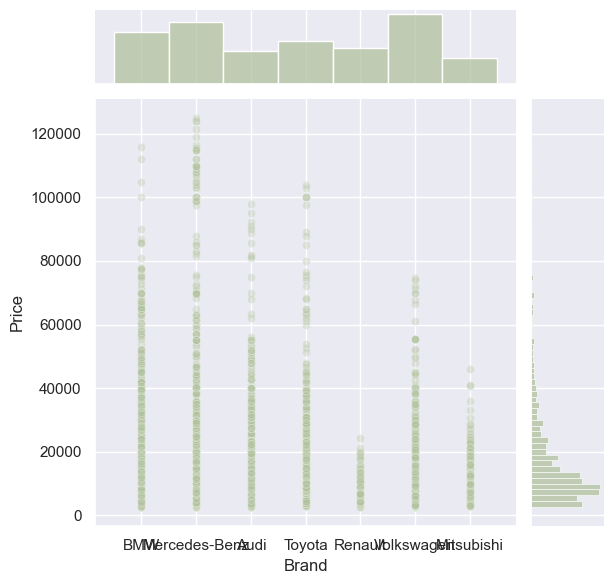

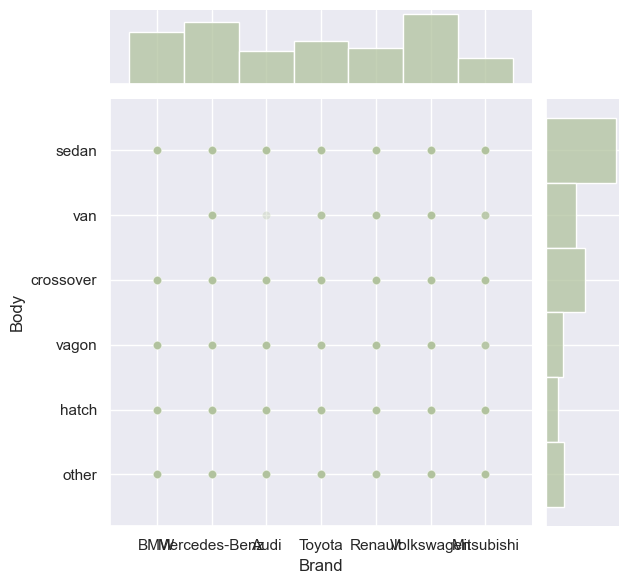

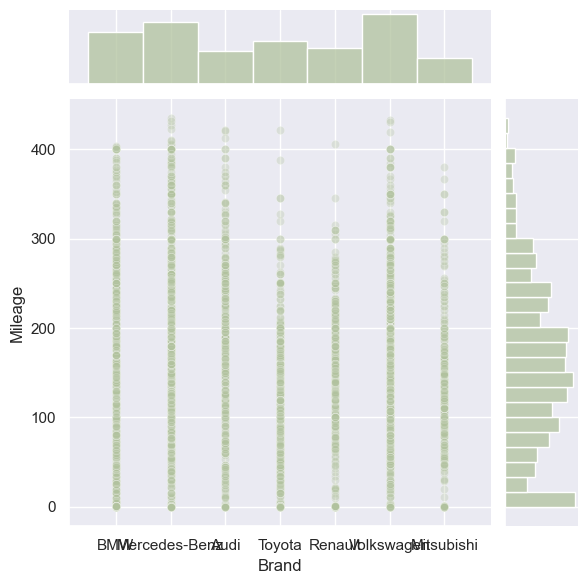

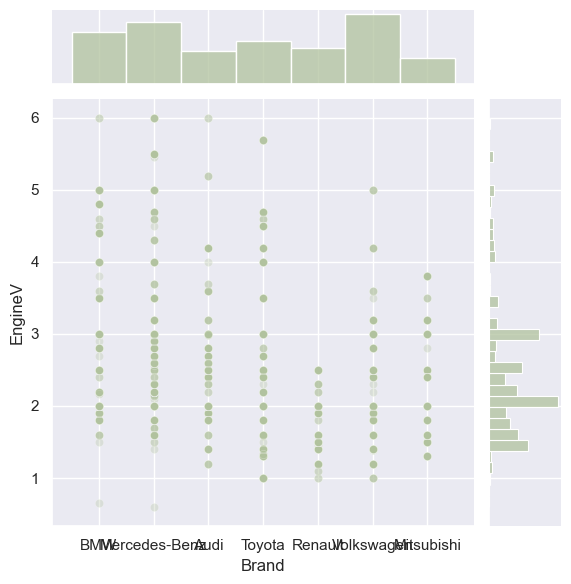

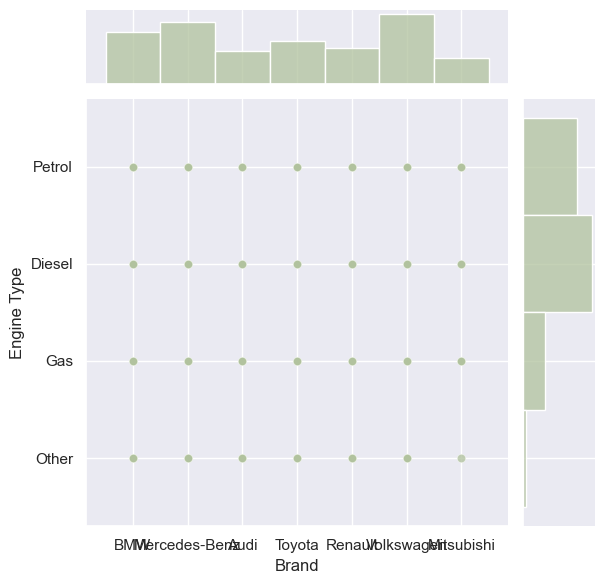

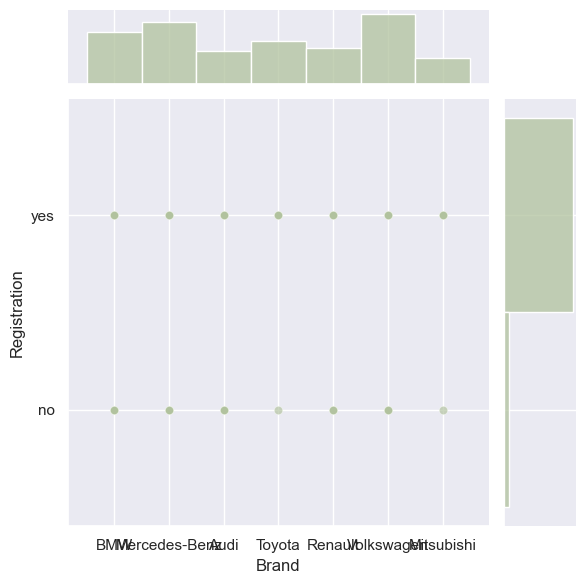

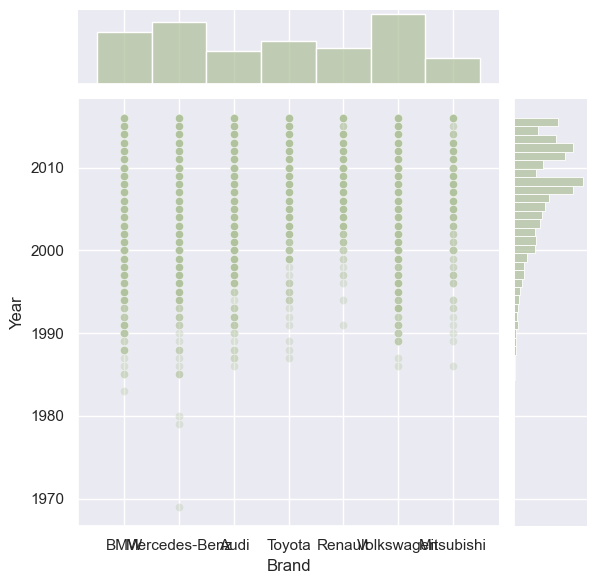

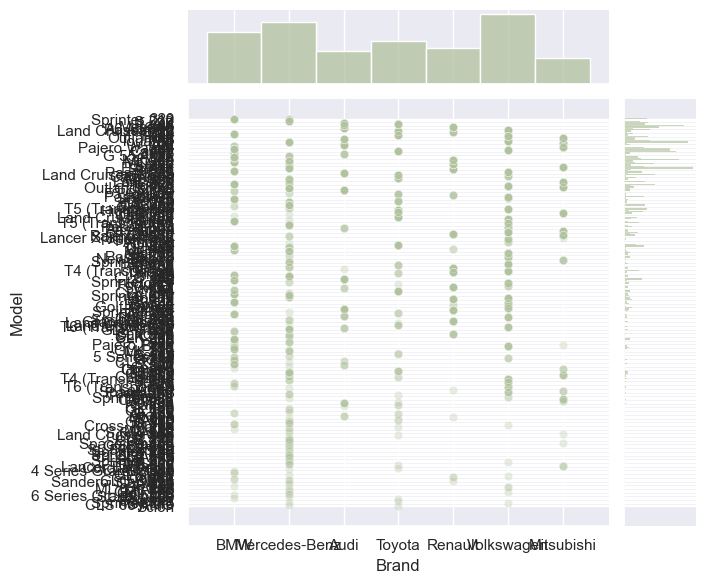

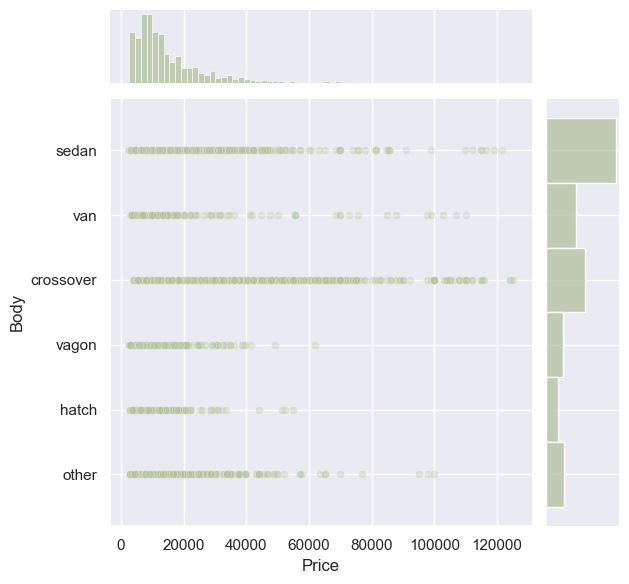

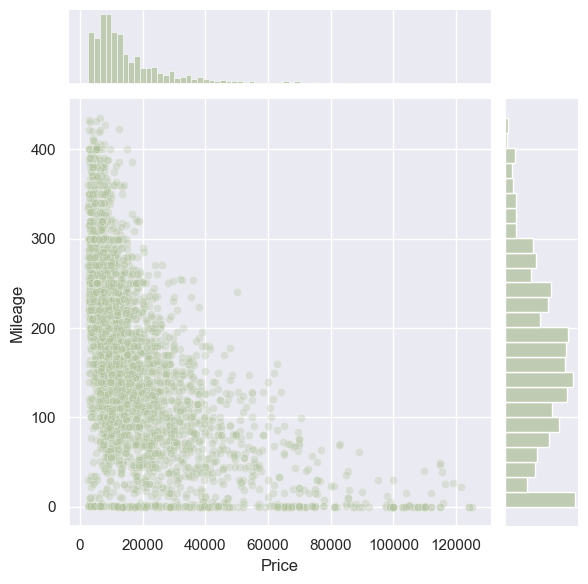

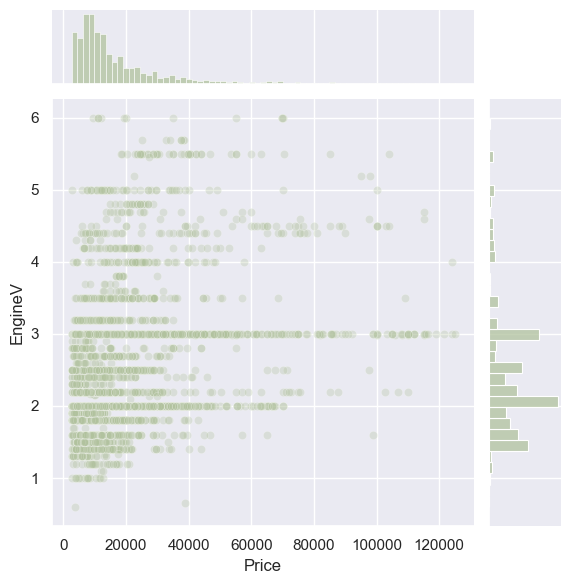

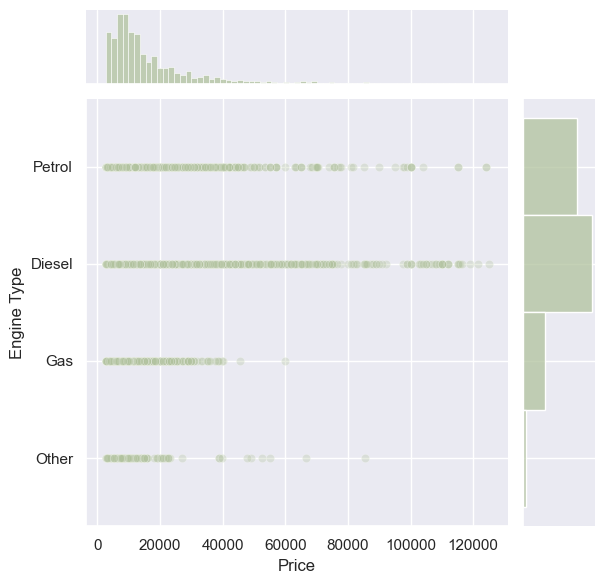

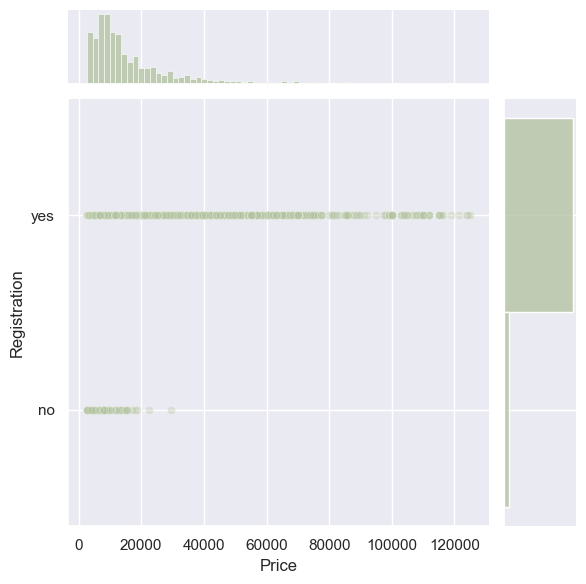

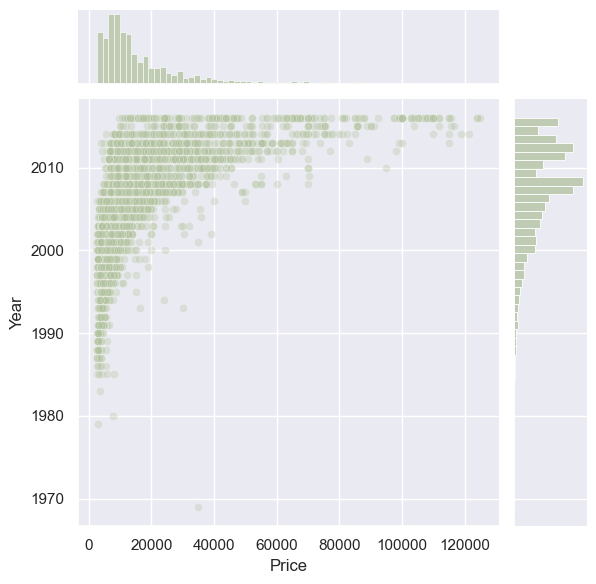

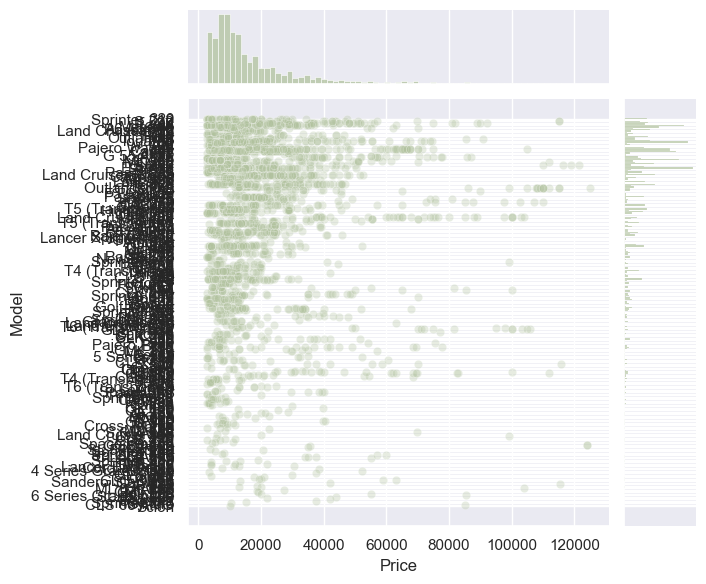

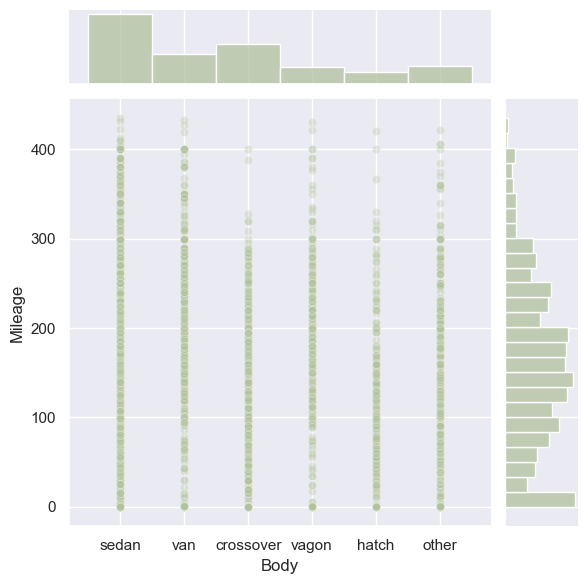

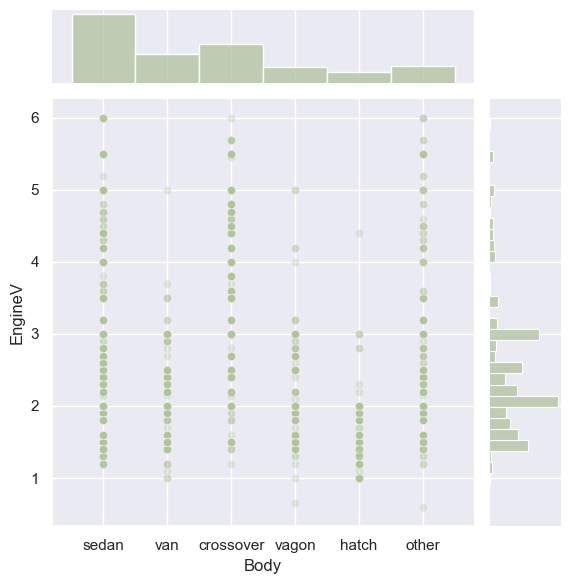

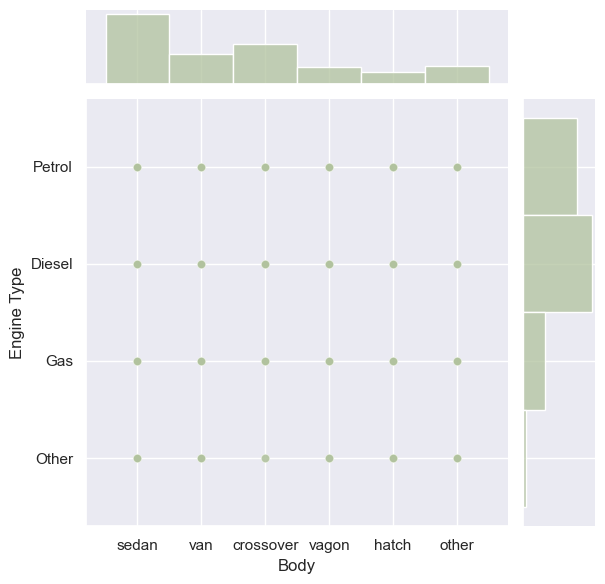

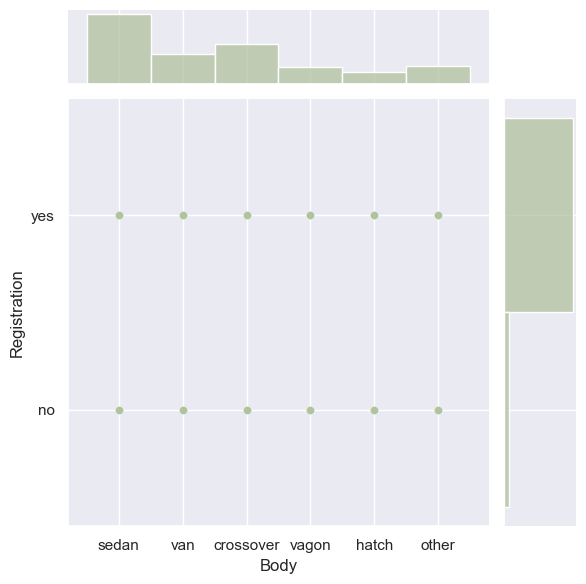

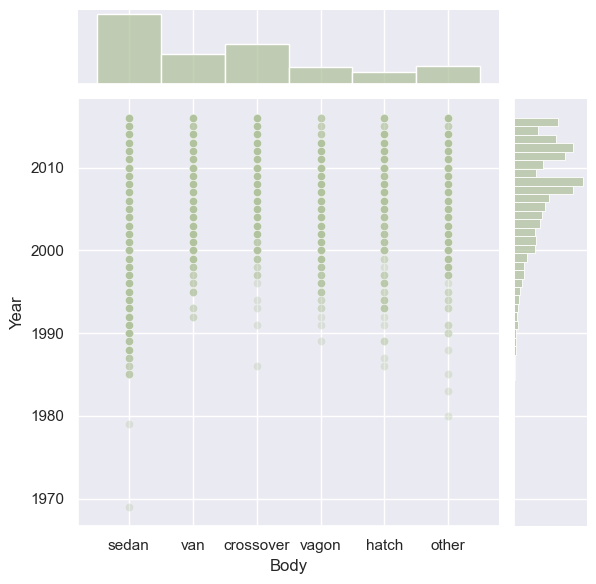

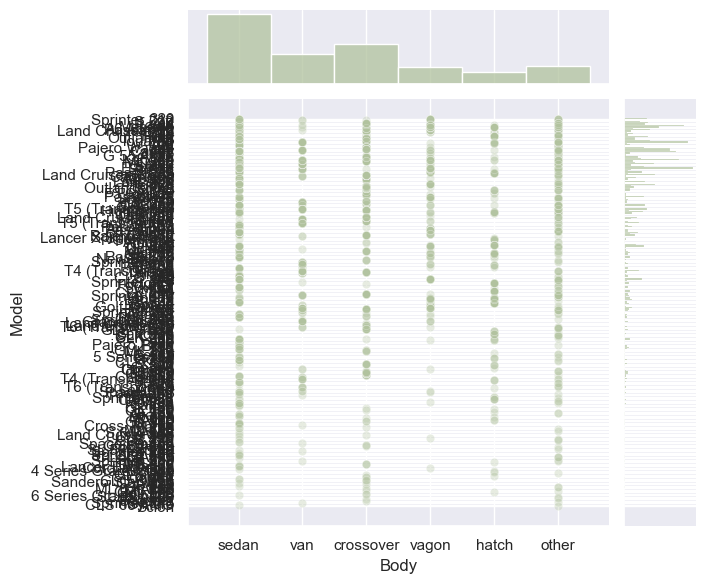

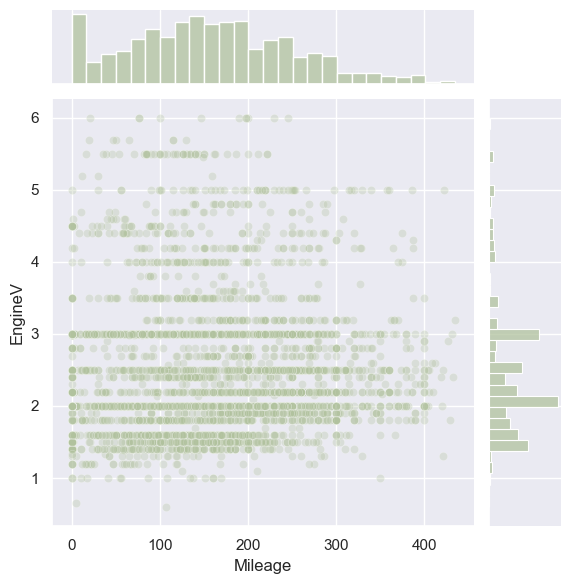

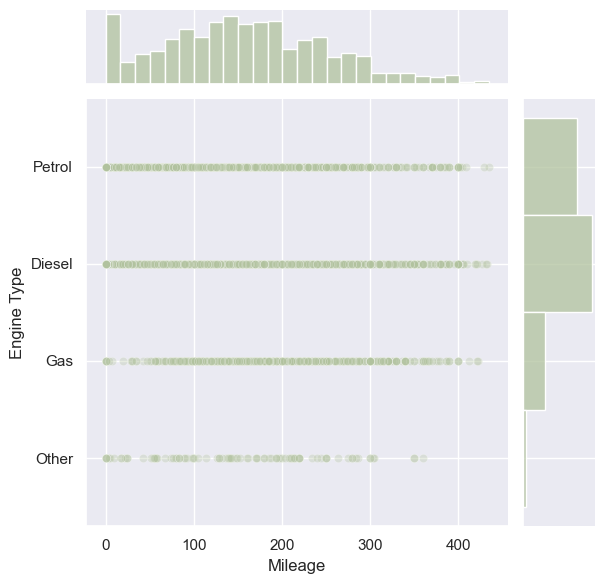

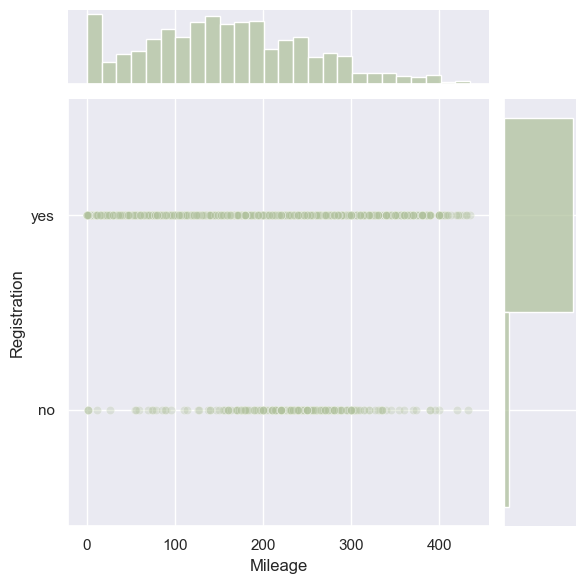

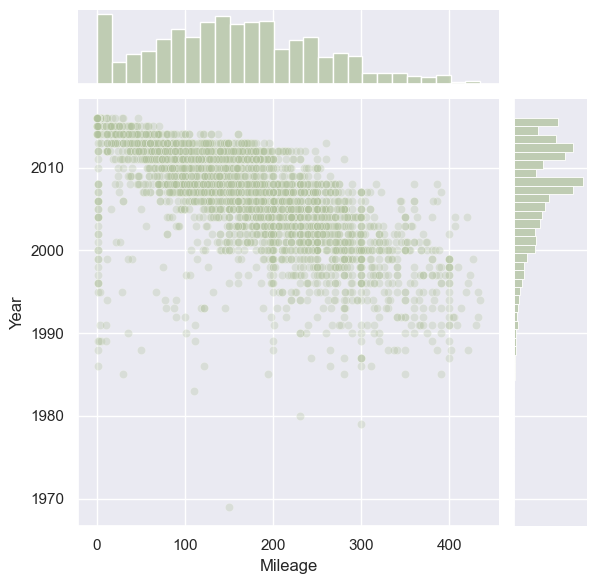

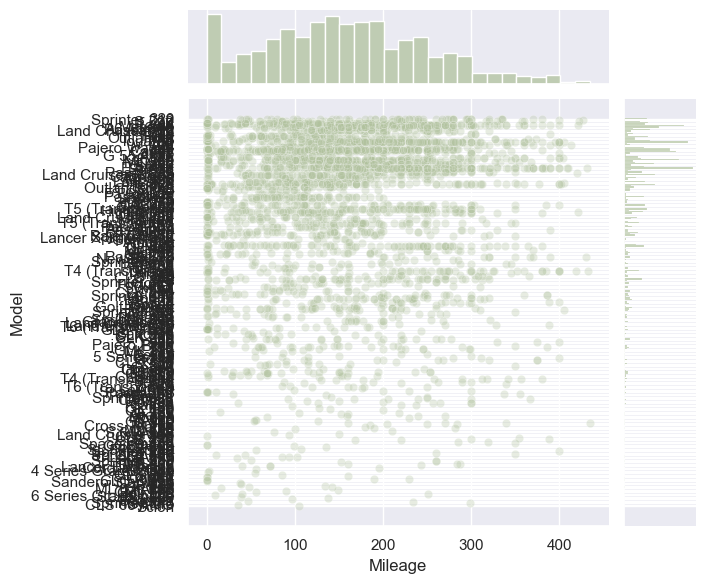

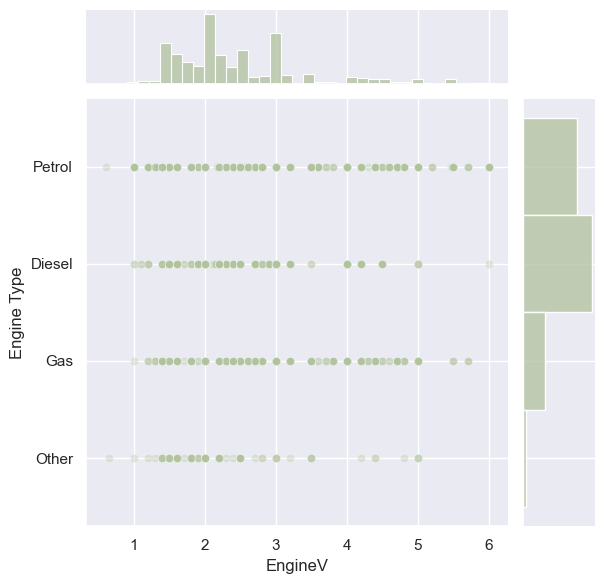

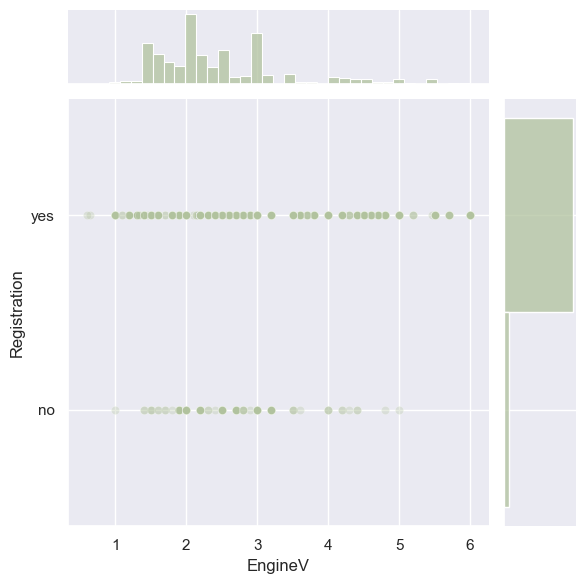

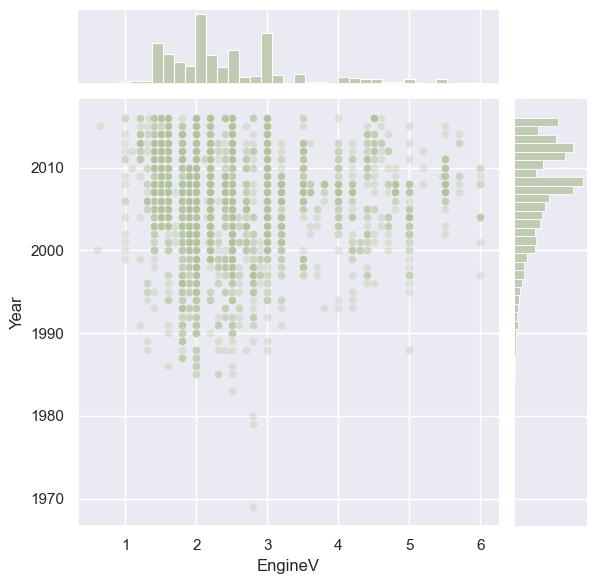

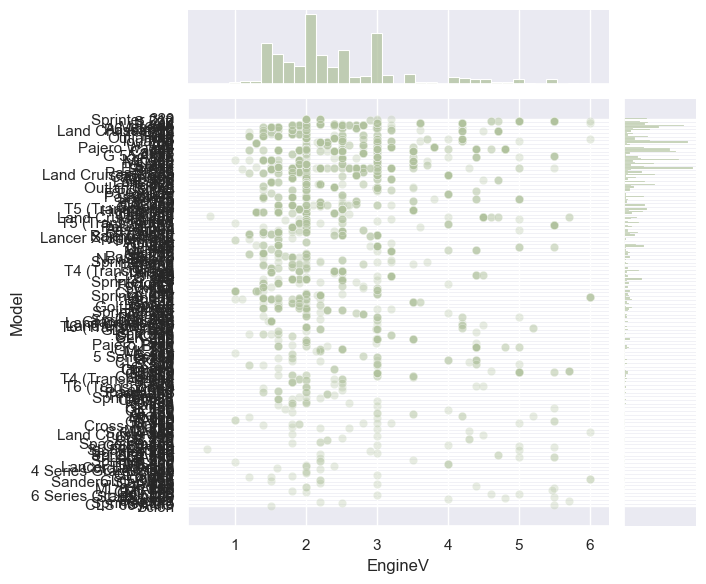

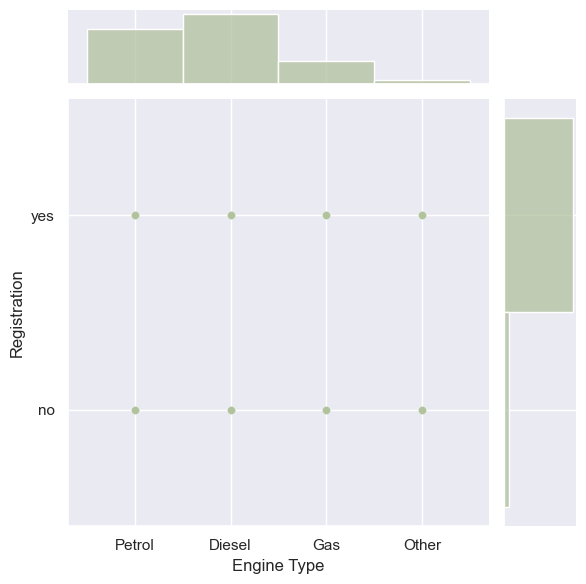

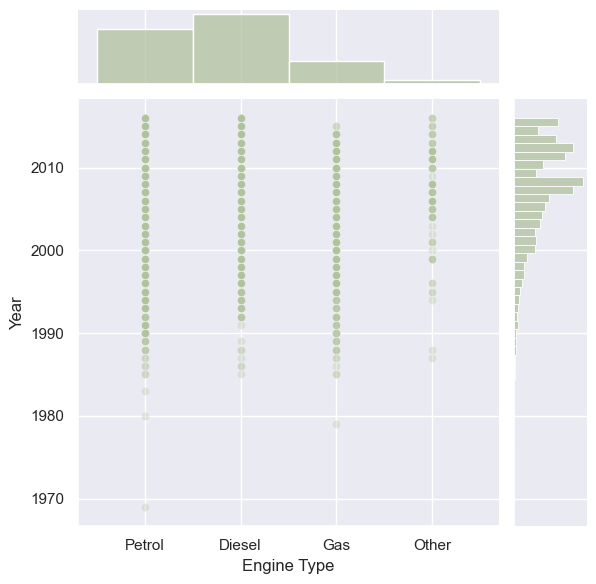

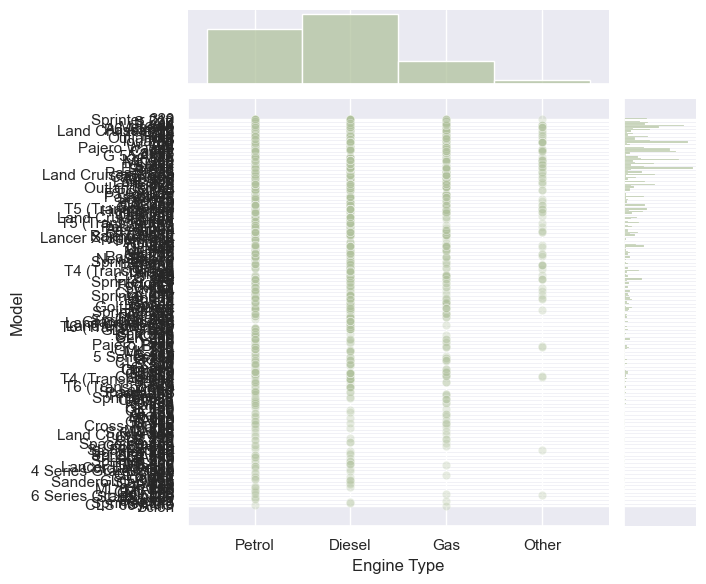

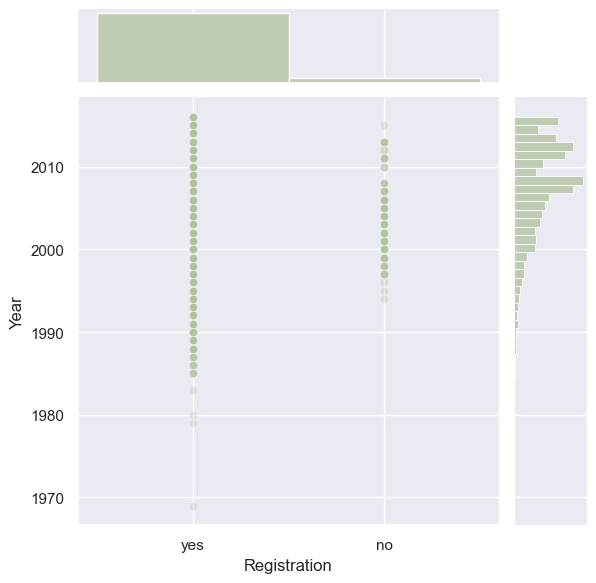

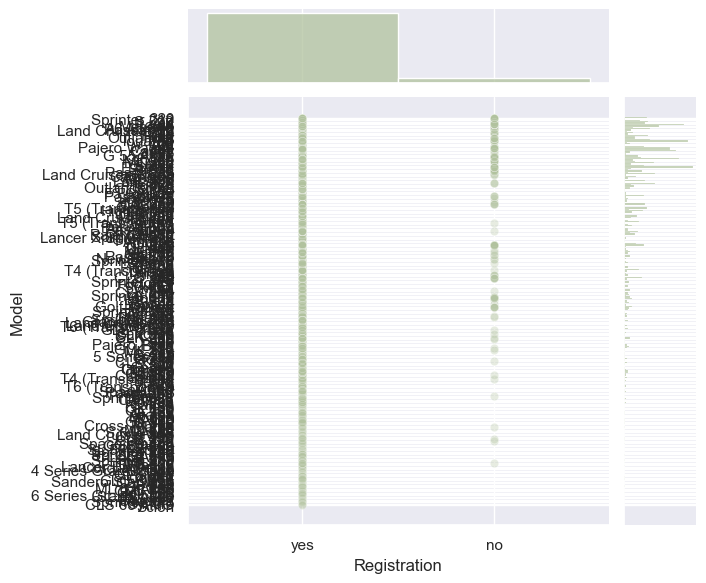

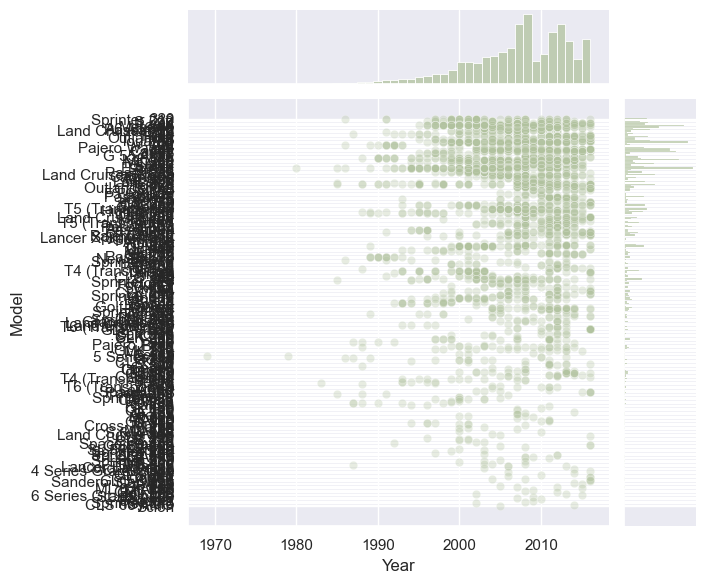

In [26]:
for item in list(itertools.combinations(col_names,2)):
    first_name = (item[0])
    second_name = (item[1])
    #print(clean_data[first_name])
        
    with sns.axes_style('darkgrid'):
        sns.jointplot(x=clean_data[first_name],
                      y=clean_data[second_name],
                      kind='scatter',
                      color ="#B1C29E",
                     joint_kws={'alpha':0.3})
    plt.show()

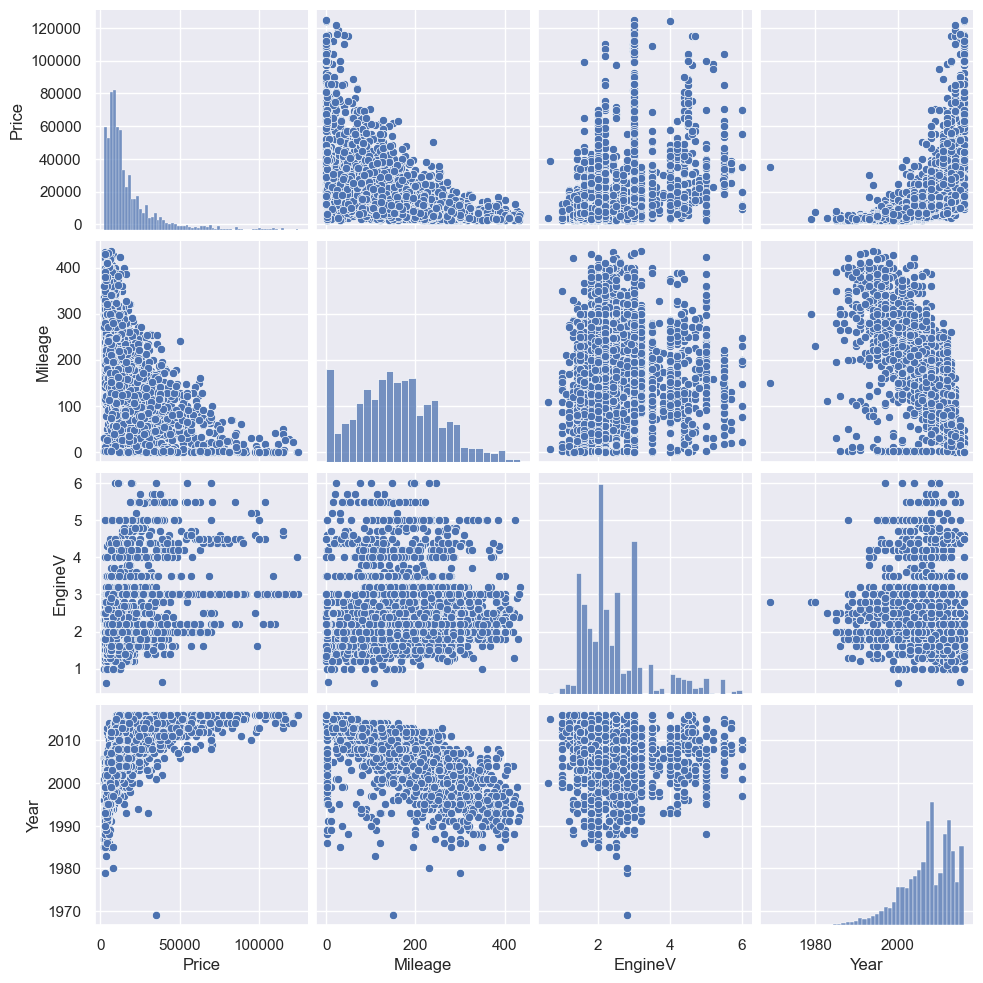

In [27]:
sns.pairplot(clean_data)

In [28]:
clean_data["log_price"]=np.log(clean_data["Price"])

In [29]:
clean_data

Brand    Price       Body  Mileage  EngineV Engine Type  \
0               BMW   4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3              Audi  23000.0  crossover      240      4.2      Petrol   
4            Toyota  18300.0  crossover      120      2.0      Petrol   
...             ...      ...        ...      ...      ...         ...   
4338     Volkswagen  11500.0        van      163      2.5      Diesel   
4339         Toyota  17900.0      sedan       35      1.6      Petrol   
4341            BMW   6500.0      sedan        1      3.5      Petrol   
4342            BMW   8000.0      sedan      194      2.0      Petrol   
4344     Volkswagen  13500.0        van      124      2.0      Diesel   

     Registration  Year              Model  log_price  
0             yes  1991                320   8.342840  
1             yes  1999       Sprinter 212   8.974618  
2             yes  2003              S 500   9.495519  
3             yes  2007                 Q7  10.043249  
4             yes  2011              Rav 4   9.814656  
...           ...   ...                ...        ...  
4338          yes  2008   T5 (Transporter)   9.350102  
4339          yes  2014            Corolla   9.792556  
4341          yes  1999                535   8.779557  
4342          yes  1985                520   8.987197  
4344          yes  2013  T5 (Transporter)    9.510445  

[3651 rows x 10 columns]

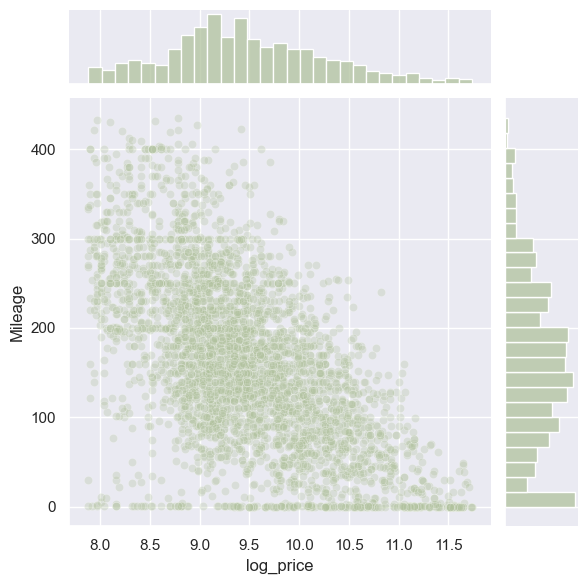

In [30]:
with sns.axes_style('darkgrid'):
    sns.jointplot(x=clean_data["log_price"],
                  y=clean_data["Mileage"],
                  kind='scatter',
                  color ="#B1C29E",
                 joint_kws={'alpha':0.3})

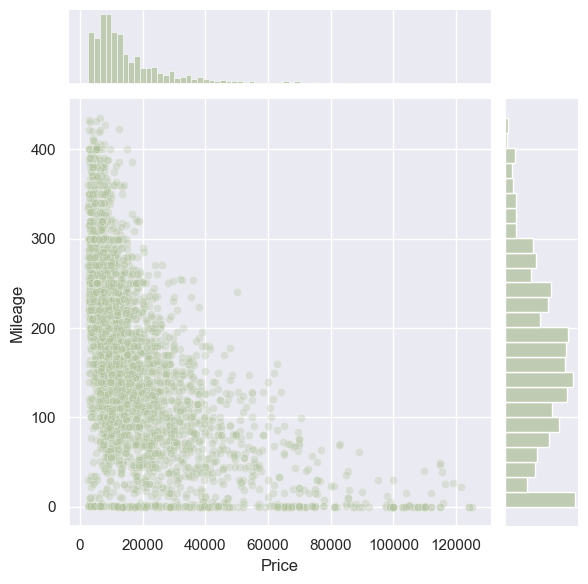

In [31]:
with sns.axes_style('darkgrid'):
    sns.jointplot(x=clean_data["Price"],
                  y=clean_data["Mileage"],
                  kind='scatter',
                  color ="#B1C29E",
                 joint_kws={'alpha':0.3})

In [32]:
clean_data = clean_data.drop(['Price', 'Model'], axis = 1)

In [33]:
clean_data

Brand       Body  Mileage  EngineV Engine Type Registration  \
0               BMW      sedan      277      2.0      Petrol          yes   
1     Mercedes-Benz        van      427      2.9      Diesel          yes   
2     Mercedes-Benz      sedan      358      5.0         Gas          yes   
3              Audi  crossover      240      4.2      Petrol          yes   
4            Toyota  crossover      120      2.0      Petrol          yes   
...             ...        ...      ...      ...         ...          ...   
4338     Volkswagen        van      163      2.5      Diesel          yes   
4339         Toyota      sedan       35      1.6      Petrol          yes   
4341            BMW      sedan        1      3.5      Petrol          yes   
4342            BMW      sedan      194      2.0      Petrol          yes   
4344     Volkswagen        van      124      2.0      Diesel          yes   

      Year  log_price  
0     1991   8.342840  
1     1999   8.974618  
2     2003   9.495519  
3     2007  10.043249  
4     2011   9.814656  
...    ...        ...  
4338  2008   9.350102  
4339  2014   9.792556  
4341  1999   8.779557  
4342  1985   8.987197  
4344  2013   9.510445  

[3651 rows x 8 columns]

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = clean_data[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [35]:
variables.shape

(3651, 3)

In [36]:
vif

VIF features
0   3.834224  Mileage
1  10.403464     Year
2   7.966489  EngineV

In [37]:
clean_data = clean_data.drop('Year', axis = 1)

In [38]:
clean_data

Brand       Body  Mileage  EngineV Engine Type Registration  \
0               BMW      sedan      277      2.0      Petrol          yes   
1     Mercedes-Benz        van      427      2.9      Diesel          yes   
2     Mercedes-Benz      sedan      358      5.0         Gas          yes   
3              Audi  crossover      240      4.2      Petrol          yes   
4            Toyota  crossover      120      2.0      Petrol          yes   
...             ...        ...      ...      ...         ...          ...   
4338     Volkswagen        van      163      2.5      Diesel          yes   
4339         Toyota      sedan       35      1.6      Petrol          yes   
4341            BMW      sedan        1      3.5      Petrol          yes   
4342            BMW      sedan      194      2.0      Petrol          yes   
4344     Volkswagen        van      124      2.0      Diesel          yes   

      log_price  
0      8.342840  
1      8.974618  
2      9.495519  
3     10.043249  
4      9.814656  
...         ...  
4338   9.350102  
4339   9.792556  
4341   8.779557  
4342   8.987197  
4344   9.510445  

[3651 rows x 7 columns]

In [39]:
data_with_dummies = pd.get_dummies(clean_data, drop_first = True)

In [40]:
data_with_dummies.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [41]:
data_with_dummies = data_with_dummies[[ 'log_price','Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']]

In [42]:
data_with_dummies

log_price  Mileage  EngineV  Brand_BMW  Brand_Mercedes-Benz  \
0      8.342840      277      2.0       True                False   
1      8.974618      427      2.9      False                 True   
2      9.495519      358      5.0      False                 True   
3     10.043249      240      4.2      False                False   
4      9.814656      120      2.0      False                False   
...         ...      ...      ...        ...                  ...   
4338   9.350102      163      2.5      False                False   
4339   9.792556       35      1.6      False                False   
4341   8.779557        1      3.5       True                False   
4342   8.987197      194      2.0       True                False   
4344   9.510445      124      2.0      False                False   

      Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                False          False         False             False   
1                False          False         False             False   
2                False          False         False             False   
3                False          False         False             False   
4                False          False          True             False   
...                ...            ...           ...               ...   
4338             False          False         False              True   
4339             False          False          True             False   
4341             False          False         False             False   
4342             False          False         False             False   
4344             False          False         False              True   

      Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  \
0          False       False        True       False     False   
1          False       False       False       False      True   
2          False       False        True       False     False   
3          False       False       False       False     False   
4          False       False       False       False     False   
...          ...         ...         ...         ...       ...   
4338       False       False       False       False      True   
4339       False       False        True       False     False   
4341       False       False        True       False     False   
4342       False       False        True       False     False   
4344       False       False       False       False      True   

      Engine Type_Gas  Engine Type_Other  Engine Type_Petrol  Registration_yes  
0               False              False                True              True  
1               False              False               False              True  
2                True              False               False              True  
3               False              False                True              True  
4               False              False                True              True  
...               ...                ...                 ...               ...  
4338            False              False               False              True  
4339            False              False                True              True  
4341            False              False                True              True  
4342            False              False                True              True  
4344            False              False               False              True  

[3651 rows x 18 columns]

In [43]:
data_with_dummies.head()

log_price  Mileage  EngineV  Brand_BMW  Brand_Mercedes-Benz  \
0   8.342840      277      2.0       True                False   
1   8.974618      427      2.9      False                 True   
2   9.495519      358      5.0      False                 True   
3  10.043249      240      4.2      False                False   
4   9.814656      120      2.0      False                False   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0             False          False         False             False   
1             False          False         False             False   
2             False          False         False             False   
3             False          False         False             False   
4             False          False          True             False   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0       False       False        True       False     False            False   
1       False       False       False       False      True            False   
2       False       False        True       False     False             True   
3       False       False       False       False     False            False   
4       False       False       False       False     False            False   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0              False                True              True  
1              False               False              True  
2              False               False              True  
3              False                True              True  
4              False                True              True

In [44]:
y = data_with_dummies.log_price
X = data_with_dummies.drop('log_price', axis =1)

In [45]:
scaler = StandardScaler()
scaler.fit(X)
sc_X = scaler.transform(X)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(sc_X, y, test_size= 0.2, random_state= 10)

In [47]:
price_model = LinearRegression()
price_model.fit(X_train,y_train)

LinearRegression()

In [48]:
price_model.coef_

array([-0.44973876,  0.20441703,  0.02556737,  0.02261411, -0.12434627,
       -0.16969186, -0.04978459, -0.0694123 , -0.12958834, -0.09786726,
       -0.19257746, -0.11205148, -0.1658741 , -0.12095547, -0.02845932,
       -0.15198354,  0.2281658 ])

In [49]:
price_model.intercept_

np.float64(9.468471449182406)

In [50]:
price_model.score(X_train, y_train)

0.7328031300231966

In [51]:
from sklearn.feature_selection import f_regression
p_value = f_regression(X_train, y_train)[1].round(3)

In [52]:
p_value

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  ,
       0.  , 0.  , 0.  , 0.1 , 0.2 , 0.  ])

In [53]:
X.columns

Index(['Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [54]:
fit_summary = pd.DataFrame(X.columns, columns=['Features'])

In [55]:
fit_summary["coeff"] = price_model.coef_
fit_summary['p_value'] = p_value

In [56]:
fit_summary

Features     coeff  p_value
0               Mileage -0.449739     0.00
1               EngineV  0.204417     0.00
2             Brand_BMW  0.025567     0.00
3   Brand_Mercedes-Benz  0.022614     0.00
4      Brand_Mitsubishi -0.124346     0.00
5         Brand_Renault -0.169692     0.00
6          Brand_Toyota -0.049785     0.00
7      Brand_Volkswagen -0.069412     0.00
8            Body_hatch -0.129588     0.00
9            Body_other -0.097867     0.03
10           Body_sedan -0.192577     0.00
11           Body_vagon -0.112051     0.00
12             Body_van -0.165874     0.00
13      Engine Type_Gas -0.120955     0.00
14    Engine Type_Other -0.028459     0.10
15   Engine Type_Petrol -0.151984     0.20
16     Registration_yes  0.228166     0.00

In [57]:
y_hat = price_model.predict(X_test)

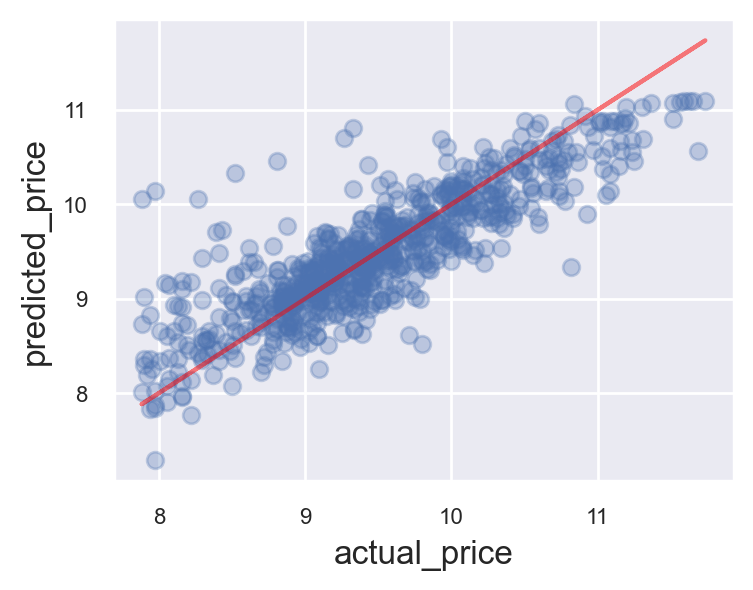

In [58]:
plt.figure(figsize =(4,3), dpi=200)
plt.scatter(y_test, y_hat, alpha =0.3)
plt.xticks(fontsize=8)
plt.ylabel(ylabel="predicted_price")
plt.xlabel(xlabel="actual_price")
plt.yticks(fontsize=8)
plt.plot(y_test, y_test, color ='red', alpha =0.5)
plt.show()

In [59]:
residual = y_test - y_hat

<Axes: xlabel='log_price', ylabel='Count'>

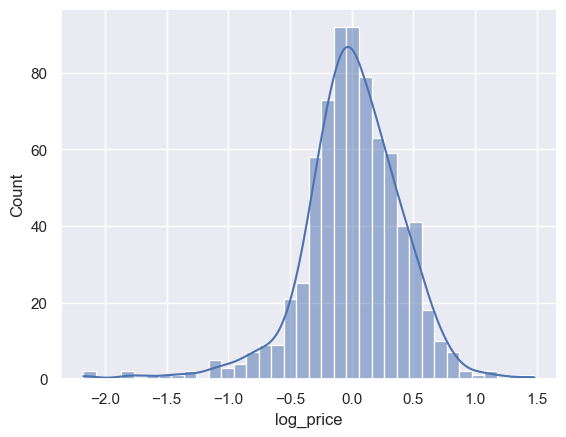

In [60]:
sns.histplot(residual, kde=True)

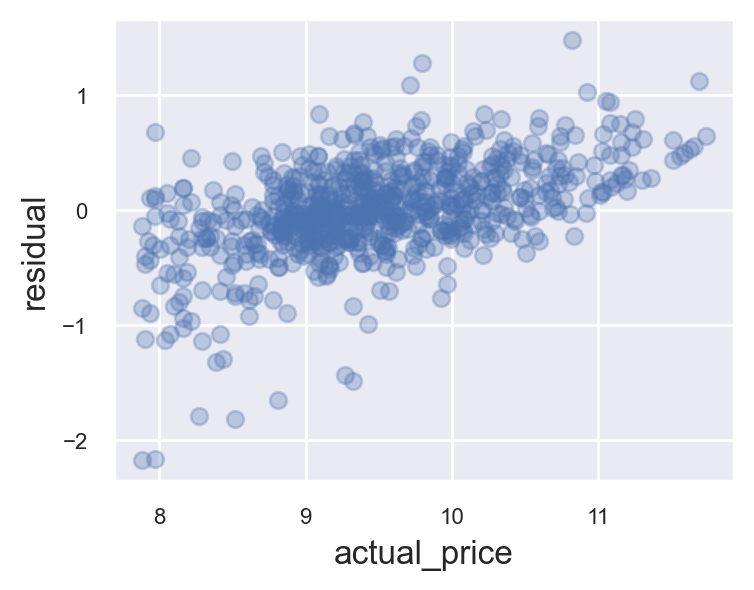

In [61]:
plt.figure(figsize =(4,3), dpi=200)
plt.scatter(y_test, residual, alpha =0.3)
plt.xticks(fontsize=8)
plt.ylabel(ylabel="residual")
plt.xlabel(xlabel="actual_price")
plt.yticks(fontsize=8)
#plt.plot(y_test, y_test, color ='red', alpha =0.5)
plt.show()